<a href="https://colab.research.google.com/github/suhrobm/Methods-and-Models-for-Multivariate-Data-Analysis/blob/main/Lab2_Suhrob_Munavarov_J4134c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TASK 2. ANALYSIS OF MULTIVARIATE RANDOM VARIABLES

---


### Content 🎯



1. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV
2. Estimation of Multivariate Mathematical Expectation and Variance
3. Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances
4. Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels
5. Task Formulation for Regression, Multivariate Correlation
6. Regression Model, Multicollinearity and Regularization
7. Quality Analysis


# **About Dataset**

In this task, the previous chosen dataset is being used.

#  **About this file:** 

**url:** the url which fetches the data

**id:** the id of transaction

**Lng:** and Lat coordinates, using the BD09 protocol

**Cid:** community id

**tradeTime:** the time of transaction

**DOM:** active days on market. Know more in https://en.wikipedia.org/wiki/Days_on_market

**followers:** the number of people follow the transaction

**totalPrice:** the total price

**price:** the average price by square

**square:** the square of house

**livingRoom:** the number of living room

**drawingRoom:** the number of drawing room

**kitchen:** the number of kitchen

**bathroom:** the number of bathroom

**floor:** the height of the house. I will turn the Chinese characters to English in the next version

**buildingType:** including tower (1), bungalow (2), combination of plate and tower (3), plate (4)

**constructionTime:** the time of construction

**renovationCondition:** including other (1), rough (2), Simplicity (3), hardcover (4)

**buildingStructure:** including unknow (1), mixed (2), brick and wood (3), brick and concrete (4), steel (5) and steel-concrete composite (6)

**ladderRatio:** the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average elevator have (1) or not have elevator (0)

**fiveYearsProperty:** if the owner have the property for less than 5 years

### 1. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.optimize
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from google.colab import drive
drive.mount('/content/drive')

# prevents numpy scientific/exponential notation on print, default is False
# force-suppressing the scientific notation, it is rounded and justified
np.set_printoptions(suppress=False, formatter={'float_kind':'{:0.2f}'.format})
# ignoring warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Reading whole dataset from file and loading the data and save it in a DataFrame 
df = pd.read_csv('/content/drive/MyDrive/MMMDA/Housing price in Beijing.csv', encoding = 'ISO-8859-1')
print(df.shape)
df.head(3)

(318851, 26)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0


In [ ]:
# info() helps us to see how many values are existing in each column and their data type.
# Here, we can see many columns have missing values which we need to fill with some sensible values. 
# Handling missing data is important as many machine learning algorithms do not support data with missing values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [ ]:
# describe() is used to view some basic statistical details like percentile, mean, std, etc. of a DataFrame.
df.describe()


,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [ ]:
# .corr() is used to find the pairwise correlation of all columns in the dataframe.
df.corr()


,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
Lng,1.000000,0.040847,-0.007301,-0.014274,-0.012846,-0.069831,-0.153212,0.064499,0.059142,0.008718,-0.005859,0.041754,0.002027,0.044275,0.009599,-0.015972,0.223282,-0.175197
Lat,0.040847,1.000000,-0.000257,0.022363,-0.005676,0.019969,-0.052004,0.119889,-0.000721,0.099777,0.011923,-0.157967,-0.000197,-0.102542,0.009689,-0.077373,0.308592,-0.068064
Cid,-0.007301,-0.000257,1.000000,0.000952,0.001264,0.000071,-0.000387,-0.000413,-0.002429,0.006176,-0.001008,0.001097,-0.000019,-0.000505,-0.008716,0.000992,-0.004429,-0.005487
DOM,-0.014274,0.022363,0.000952,1.000000,0.465489,0.225404,0.215473,0.080909,0.010662,-0.010857,0.152300,0.025380,-0.001083,0.023424,-0.044317,0.010079,-0.001235,0.026475
followers,-0.012846,-0.005676,0.001264,0.465489,1.000000,0.152681,0.257173,-0.050814,0.007651,0.010707,0.241108,-0.022586,-0.000200,-0.020761,0.049632,0.018243,-0.032447,-0.012286
totalPrice,-0.069831,0.019969,0.000071,0.225404,0.152681,1.000000,0.622658,0.575843,0.081393,-0.060346,0.250890,0.188114,-0.001063,0.192345,-0.003225,0.113183,0.010315,0.421428
price,-0.153212,-0.052004,-0.000387,0.215473,0.257173,0.622658,1.000000,-0.164734,0.013289,-0.048676,0.294859,0.042889,0.001107,0.050528,0.014151,0.232571,0.034186,0.683768
square,0.064499,0.119889,-0.000413,0.080909,-0.050814,0.575843,-0.164734,1.000000,0.087816,-0.013511,0.031502,0.156217,-0.002420,0.168131,-0.018164,-0.094973,-0.007301,-0.146136
kitchen,0.059142,-0.000721,-0.002429,0.010662,0.007651,0.081393,0.013289,0.087816,1.000000,0.013062,-0.009705,-0.010838,0.000124,-0.005167,0.045779,0.010617,-0.033746,0.024271
buildingType,0.008718,0.099777,0.006176,-0.010857,0.010707,-0.060346,-0.048676,-0.013511,0.013062,1.000000,-0.011312,-0.535491,-0.000017,-0.630052,-0.000532,-0.147666,0.043837,-0.089884


In [ ]:
# Now, we select the most significant features and correlated features from the correlation matrix for further implementations
df = df[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']]
df.info()
print(f'\n Dataframe shape is: {df.shape}\n')
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   price                318851 non-null  int64  
 3   square               318851 non-null  float64
 4   totalPrice           318851 non-null  float64
 5   renovationCondition  318851 non-null  int64  
 6   communityAverage     318388 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 17.0 MB

 Dataframe shape is: (318851, 7)



,Lng,Lat,price,square,totalPrice,renovationCondition,communityAverage
0,116.475489,40.019520,31680,131.00,415.0,3,56021.0
1,116.453917,39.881534,43436,132.38,575.0,4,71539.0
2,116.561978,39.877145,52021,198.00,1030.0,3,48160.0


In [ ]:
# Dealing with Missing Data (It could be, then...)

# It seems like we're about to perform training on a dataframe consisting of NaN (Not a Number) values. 
# Here are some strategies to handle NaN values:

# Remove rows with NaN values: This is generally not preferred as substantial data can be lost, 
# and could also lead to improper distribution of values.
# Filling NaN values with scalar values: This is helpful to some extent, but it can also lead to improper distribution of data.
# Filling NaN values with mean: Filling with mean helps to maintain the distribution of values in the dataframe and 
# hence is more preferred than other methods.

# Thus, let us fill NaN values using mean.

df = df.fillna(df.mean())
df.info()
print(f'\n Dataframe shape is: {df.shape}\n')
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   price                318851 non-null  int64  
 3   square               318851 non-null  float64
 4   totalPrice           318851 non-null  float64
 5   renovationCondition  318851 non-null  int64  
 6   communityAverage     318851 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 17.0 MB

 Dataframe shape is: (318851, 7)



,Lng,Lat,price,square,totalPrice,renovationCondition,communityAverage
0,116.475489,40.019520,31680,131.00,415.0,3,56021.0
1,116.453917,39.881534,43436,132.38,575.0,4,71539.0
2,116.561978,39.877145,52021,198.00,1030.0,3,48160.0


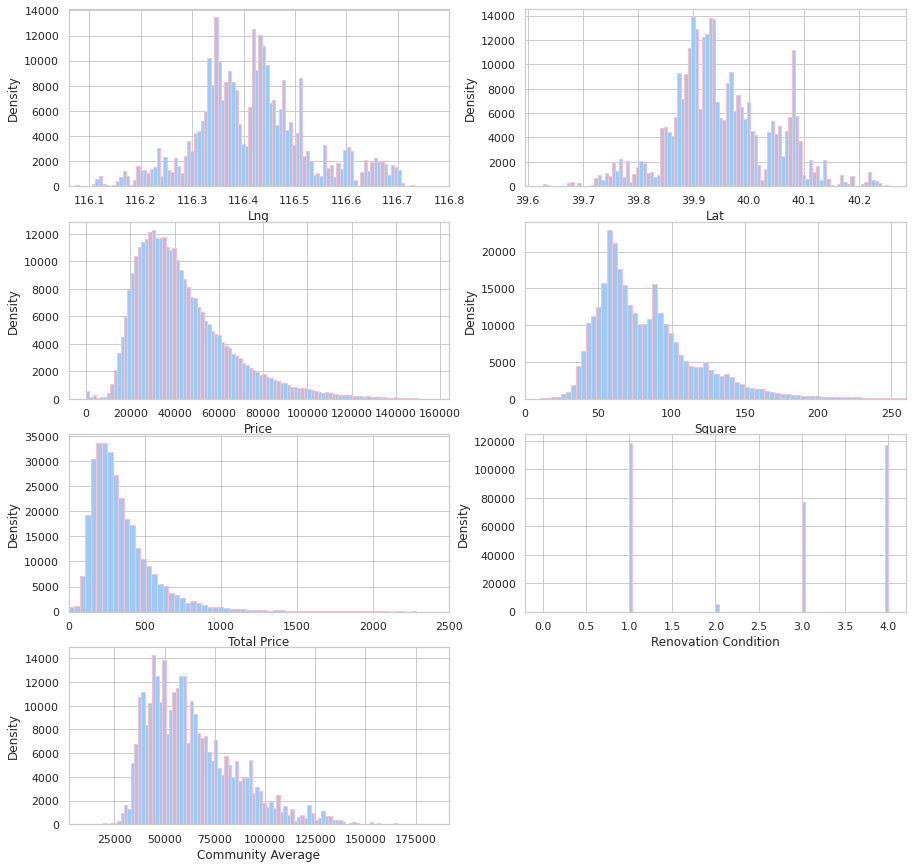

In [ ]:
# non-parametric estimation of PDF in form of histogram, each variable plotted next to each other

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(421)
plt.hist(df.Lng, bins=100, ec='pink')
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(422)
plt.hist(df.Lat, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(423)
plt.hist(df.price, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(424)
plt.hist(df.square, bins=500, ec='pink')
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.subplot(425)
plt.hist(df.totalPrice, bins=500, ec='pink')
plt.xlim(0, 2500)
plt.grid(True)
plt.xlabel('Total Price')
plt.ylabel('Density')

plt.subplot(426)
plt.hist(df.renovationCondition, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Renovation Condition')
plt.ylabel('Density')

plt.subplot(427)
plt.hist(df.communityAverage, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Community Average')
plt.ylabel('Density')

ax[3,1].set_axis_off()   # or it be used fig.delaxes(ax[3][1]), removing/hiding empty subplot
plt.show()





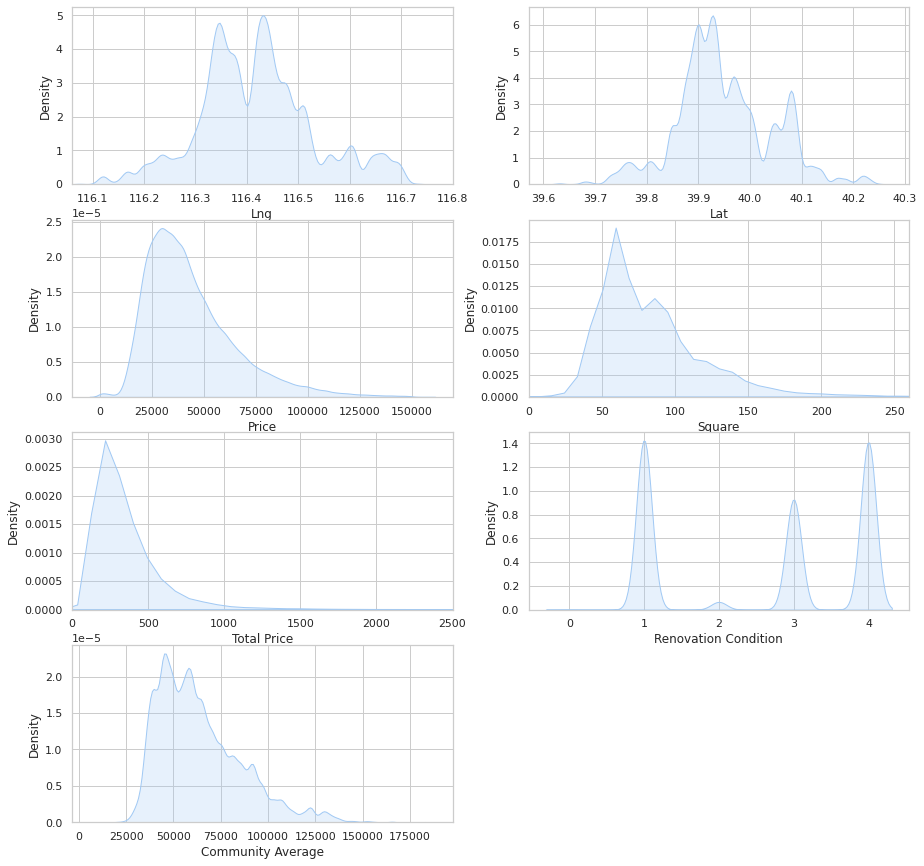

In [ ]:
# non-parametric estimation of PDF using kernel density function, each variable plotted next to each other
# we can get a smooth distribution estimate using the kernel density estimate that Seaborn does with kdeplot function

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(421)
sns.kdeplot(df.Lng, shade=True)
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(422)
sns.kdeplot(df.Lat, shade=True)
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(423)
sns.kdeplot(df.price, shade=True)
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(424)
sns.kdeplot(df.square, shade=True)
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.subplot(425)
sns.kdeplot(df.totalPrice, shade=True)
plt.xlim(0, 2500)
plt.grid(True)
plt.xlabel('Total Price')
plt.ylabel('Density')

plt.subplot(426)
sns.kdeplot(df.renovationCondition, shade=True)
plt.grid(True)
plt.xlabel('Renovation Condition')
plt.ylabel('Density')

plt.subplot(427)
sns.kdeplot(df.communityAverage, shade=True)
plt.grid(True)
plt.xlabel('Community Average')
plt.ylabel('Density')

ax[3,1].set_axis_off()   # or it be used fig.delaxes(ax[3][1]), removing/hiding empty subplot
plt.show()

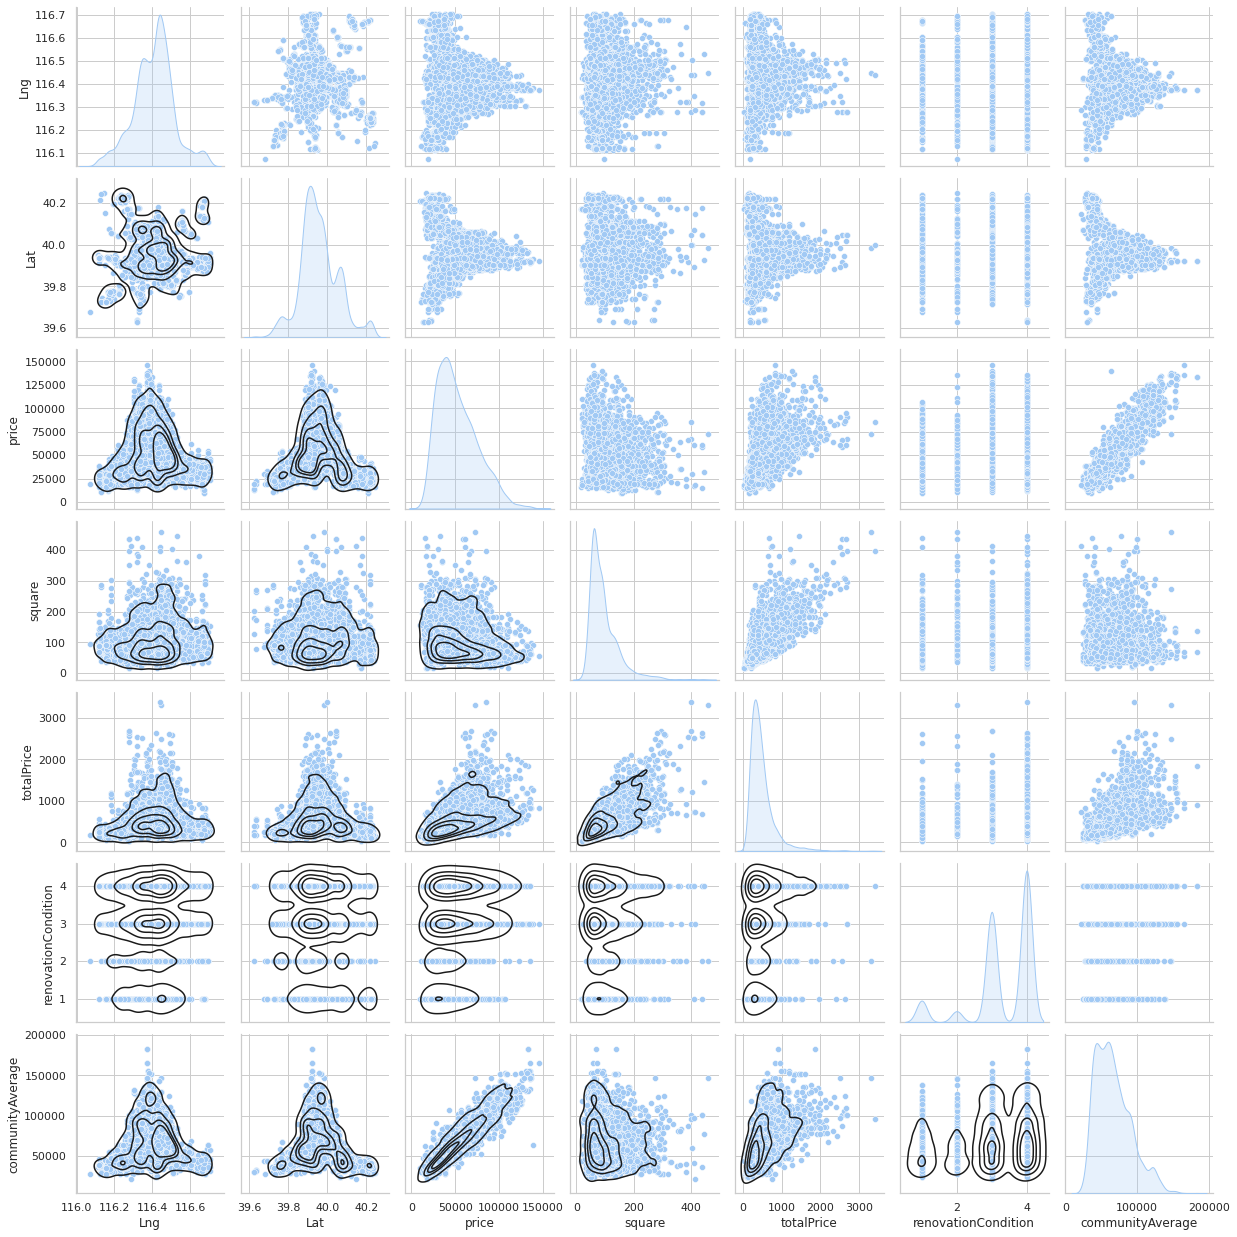

In [ ]:
# plots pairwise relationships in a dataset
# executes so much time (more than one hour, so I took just first 5000 rows)...
df_reduced = df.iloc[:5000,:]
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot(df_reduced[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']], diag_kind='kde')
ax.map_lower(sns.kdeplot, levels=5, color='.1')

plt.show()



### 2. Estimation of Multivariate Mathematical Expectation and Variance

In [ ]:
df[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].mean()


Lng                      116.418459
Lat                       39.949591
price                  43530.436379
square                    83.240597
totalPrice               349.030201
renovationCondition        2.606330
communityAverage       63682.446305
dtype: float64

In [ ]:
df[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].var()


Lng                    1.255617e-02
Lat                    8.460789e-03
price                  4.712817e+08
square                 1.386420e+03
totalPrice             5.325977e+04
renovationCondition    1.720658e+00
communityAverage       4.978699e+08
dtype: float64

### 3. Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances

In [ ]:
# first conditional case 
print(df['renovationCondition'].unique())
df_conditional = df[df.renovationCondition == 1 ]
df_conditional.head(3)

[3 4 1 2 0]


,Lng,Lat,price,square,totalPrice,renovationCondition,communityAverage
3,116.438010,40.076114,22202,134.00,297.5,1,51238.0
8,116.555729,40.162058,27917,48.00,134.0,1,44235.0
33,116.485296,39.991732,51687,114.15,590.0,1,53538.0


In [ ]:
df_conditional[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].mean()

Lng                      116.421508
Lat                       39.950136
price                  34765.402818
square                    83.030014
totalPrice               278.024598
renovationCondition        1.000000
communityAverage       63315.441834
dtype: float64

In [ ]:
df_conditional[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].var()

Lng                    1.246874e-02
Lat                    8.369326e-03
price                  3.073678e+08
square                 1.380885e+03
totalPrice             3.714603e+04
renovationCondition    0.000000e+00
communityAverage       5.011396e+08
dtype: float64

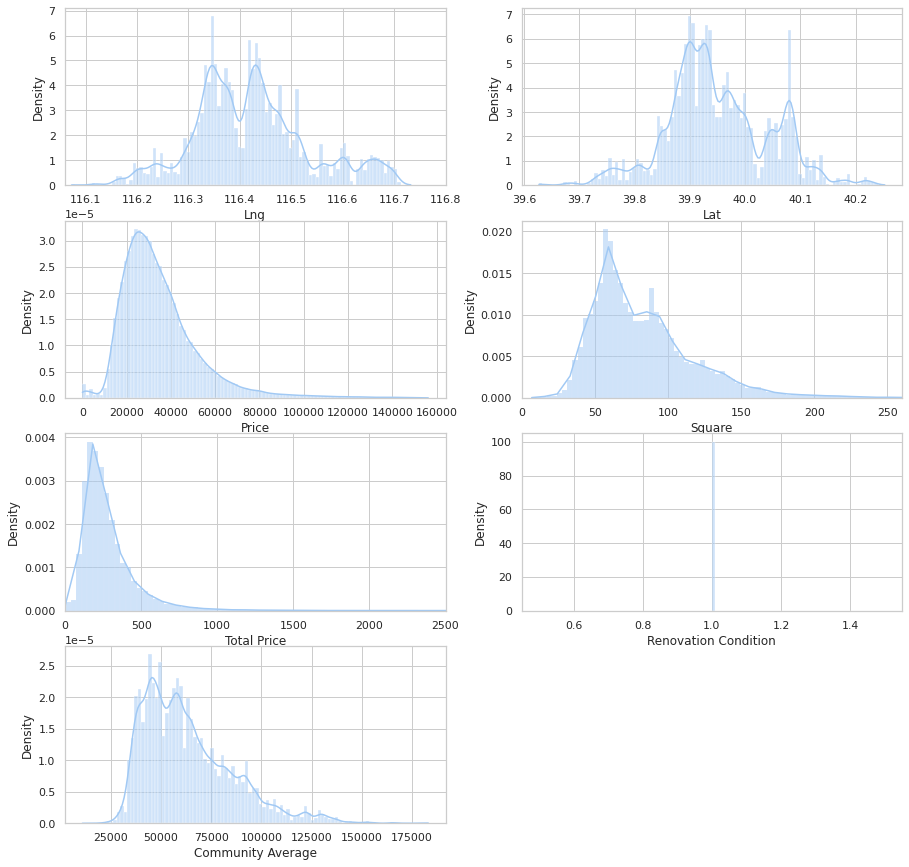

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(421)
sns.histplot(df_conditional.Lng, bins=100, kde=True, stat='density')
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(422)
sns.histplot(df_conditional.Lat, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(423)
sns.histplot(df_conditional.price, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(424)
sns.histplot(df_conditional.square, bins=500, kde=True, stat='density')
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.subplot(425)
sns.histplot(df_conditional.totalPrice, bins=500, kde=True, stat='density')
plt.xlim(0, 2500)
plt.grid(True)
plt.xlabel('Total Price')
plt.ylabel('Density')

plt.subplot(426)
sns.histplot(df_conditional.renovationCondition, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Renovation Condition')
plt.ylabel('Density')

plt.subplot(427)
sns.histplot(df_conditional.communityAverage, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Community Average')
plt.ylabel('Density')

ax[3,1].set_axis_off()   # or it be used fig.delaxes(ax[3][1]), removing/hiding empty subplot
plt.show()


In [ ]:
# second conditional case 
df['renovationCondition'].unique()
df_conditional = df[df.renovationCondition == 3 ]
df_conditional.head(3)

,Lng,Lat,price,square,totalPrice,renovationCondition,communityAverage
0,116.475489,40.019520,31680,131.0,415.0,3,56021.0
2,116.561978,39.877145,52021,198.0,1030.0,3,48160.0
5,116.466280,39.991363,52000,53.0,275.6,3,67738.0


In [ ]:
df_conditional[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].mean()

Lng                      116.409215
Lat                       39.941830
price                  49389.012414
square                    76.313369
totalPrice               359.211922
renovationCondition        3.000000
communityAverage       64665.171780
dtype: float64

In [ ]:
df_conditional[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].var()

Lng                    1.177328e-02
Lat                    7.791802e-03
price                  5.314005e+08
square                 1.003787e+03
totalPrice             3.841927e+04
renovationCondition    0.000000e+00
communityAverage       5.309330e+08
dtype: float64

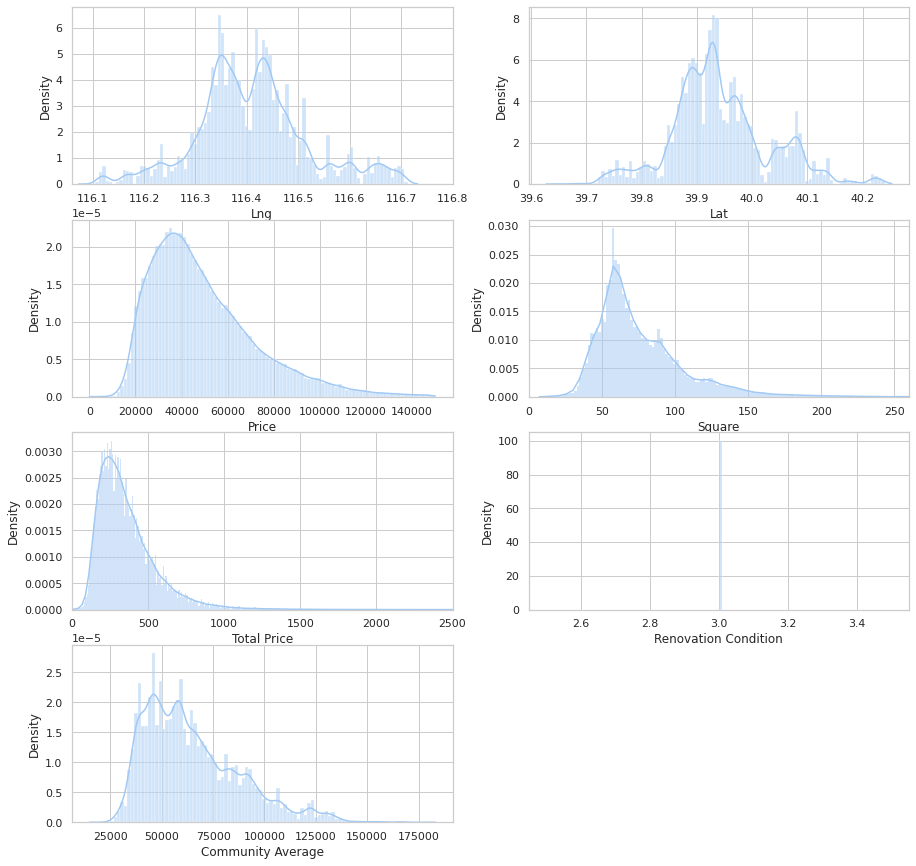

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(421)
sns.histplot(df_conditional.Lng, bins=100, kde=True, stat='density')
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(422)
sns.histplot(df_conditional.Lat, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(423)
sns.histplot(df_conditional.price, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(424)
sns.histplot(df_conditional.square, bins=500, kde=True, stat='density')
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.subplot(425)
sns.histplot(df_conditional.totalPrice, bins=500, kde=True, stat='density')
plt.xlim(0, 2500)
plt.grid(True)
plt.xlabel('Total Price')
plt.ylabel('Density')

plt.subplot(426)
sns.histplot(df_conditional.renovationCondition, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Renovation Condition')
plt.ylabel('Density')

plt.subplot(427)
sns.histplot(df_conditional.communityAverage, bins=100, kde=True, stat='density')
plt.grid(True)
plt.xlabel('Community Average')
plt.ylabel('Density')

ax[3,1].set_axis_off()   # or it be used fig.delaxes(ax[3][1]), removing/hiding empty subplot
plt.show()

### 4. Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels

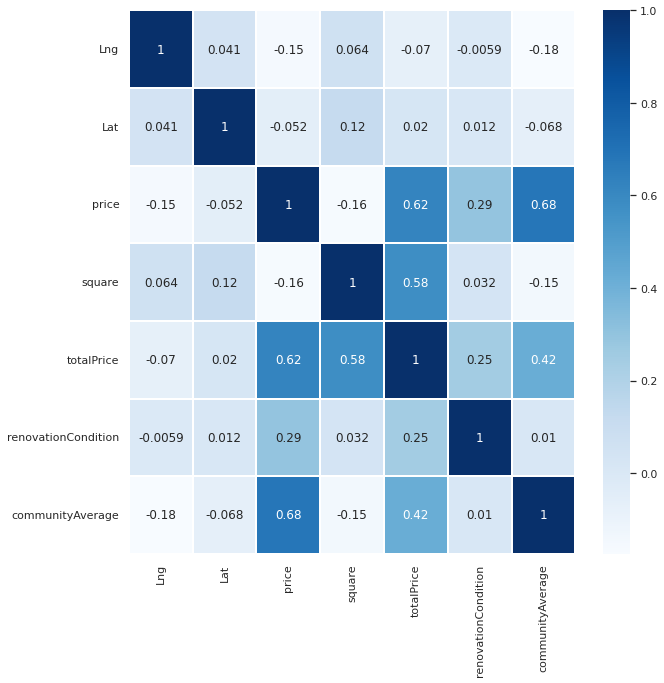

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(df[['Lng', 'Lat', 'price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']].corr(), cmap='Blues', annot=True, linewidths=0.25)

plt.show()



In [ ]:
def return_estimation(array, target, alpha=0.05):
    r, pvalue = scipy.stats.pearsonr(array, target)
    
    r_to_z = np.arctanh(r)
    se = 1 / np.sqrt(array.count() - 3)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    int_a, int_b = r_to_z - z * se, r_to_z + z * se
    int_a, int_b = np.tanh(int_a), np.tanh(int_b)
    
    print('Confidence Interval: ({:.4f}, {:.4f})'.format(int_a, int_b))
    print('Significance Level: {:.6f}'.format(pvalue))
    print('Correlation Coefficient: {:.4f}'.format(r))


print(f'\nPair community average with price: ')
return_estimation(df.communityAverage, df.price)
print()
print(f'\nPair community average with totalprice: ')
return_estimation(df.communityAverage, df.totalPrice)
print()
print(f'\nPair community average with square: ')
return_estimation(df.communityAverage, df.renovationCondition)
print()



Pair community average with price: 
Confidence Interval: (0.6794, 0.6831)
Significance Level: 0.000000
Correlation Coefficient: 0.6812


Pair community average with totalprice: 
Confidence Interval: (0.4182, 0.4239)
Significance Level: 0.000000
Correlation Coefficient: 0.4210


Pair community average with square: 
Confidence Interval: (0.0065, 0.0135)
Significance Level: 0.000000
Correlation Coefficient: 0.0100



### 5. Task Formulation for Regression, Multivariate Correlation

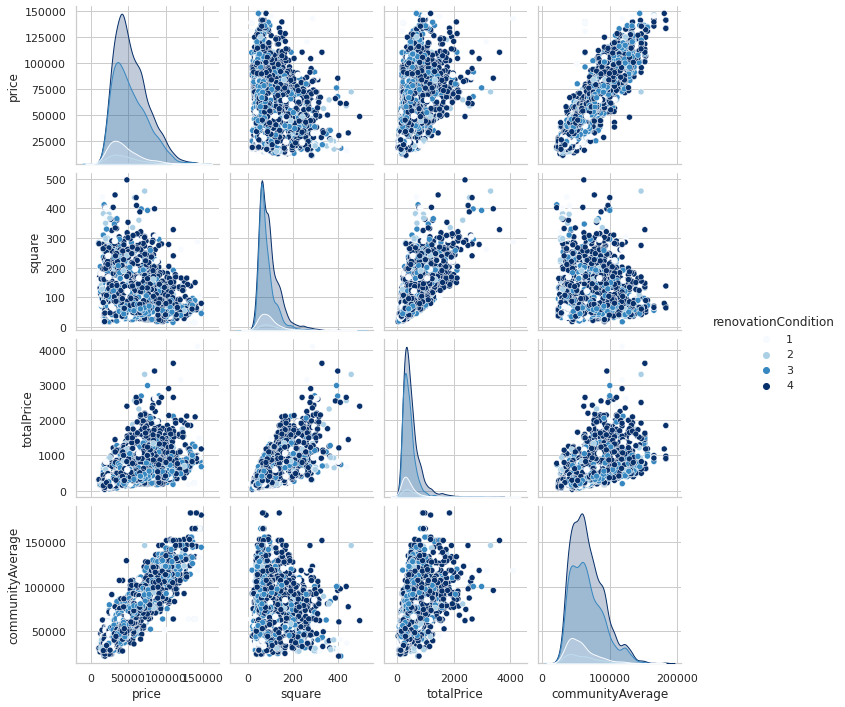

In [ ]:
# Training our model for making predictions
# executes so much time (more than one hour, so I took just first 5000 rows)...
# renovation Condition: including other (1), rough (2), Simplicity (3), hardcover (4)

df_reduced = df.iloc[:10000,:]

sns.set_theme(style='whitegrid', palette='pastel')
sns.pairplot(df_reduced[['price', 'square', 'totalPrice', 'renovationCondition', 'communityAverage']], hue='renovationCondition', kind='scatter', palette='Blues')

plt.show()



### 6. Regression Model, Multicollinearity and Regularization

In [ ]:
# as i mentioned before these are the most significant features and correlated features from the correlation matrix
df = df[['totalPrice', 'square', 'renovationCondition', 'communityAverage']]
df.info()
print(f'\n Dataframe shape is: {df.shape}\n')
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   totalPrice           318851 non-null  float64
 1   square               318851 non-null  float64
 2   renovationCondition  318851 non-null  int64  
 3   communityAverage     318851 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 9.7 MB

 Dataframe shape is: (318851, 4)



,totalPrice,square,renovationCondition,communityAverage
0,415.0,131.00,3,56021.0
1,575.0,132.38,4,71539.0
2,1030.0,198.00,3,48160.0


Let us set **totalPrice** as the target variable.

In [ ]:
x_train = np.array(df.iloc[:, 1:4])  # x_train = np.array(df.iloc[:, 1:-1]) same 
y_train = np.array(df.iloc[:, 0])  

print(x_train.shape, y_train.shape)

(318851, 3) (318851,)


**Splitting Data into Training and Test Sets**

The data we use is usually split into training data and test data using train_test_split. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [ ]:
# as usual, the dataset being used is Housing Price in Beijing, 
# where in the house prices are continuous in nature, hence, we are going to predict house prices using the several regression algorithms
# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=7)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)  

(223195, 3) (95656, 3) (223195,) (95656,)


**Metrics for testing model's performance**

The **MSE**, **MAE**, **RMSE**, and **R-Squared** are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.



*   **MAE** (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set. 
*   **MSE** (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

*   **RMSE** (Root Mean Squared Error) is the error rate by the square root of MSE.
*  **R-squared** (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.








In [ ]:
# here, we can create helper functions to append the metrics to a DataFrame containing the results
# Estimate the model accuracy by calculating R-squared and others statistics

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, x_train, y_train, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

    

**Linear Regression**

Linear regression is an algorithm which tries to learn the correlation between a dependent variable and one or more independent features.

In [ ]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
# linear equation: y = a*x + b, then reg.coef_ is equal to slope = a = gradient = teta1, reg.intercept_ is equal to b = teta0
# linear equation: y = teta0 + teta1 * x1, this is an univariate linear regression model but in our case it is multivariate
print(reg.coef_, reg.intercept_)

predicted_values = reg.predict(x_test)

results_df = append_results("Linear Regression",  LinearRegression(), results_df, y_test, predicted_values)
results_df


[4.00 39.56 0.01] -423.1457030241654


,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.793489,18690.487097,136.713156,0.645763,0.641728


**Robust Regression**

Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. A common situation in which robust estimation is used occurs when the data contain outliers. One of the most popular approaches to outlier detection is **RANSAC or Random Sample Consesus**.

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates.

In [ ]:

model = RANSACRegressor()

model.fit(x_train, y_train)

predicted_values = model.predict(x_test)

results_df = append_results(" Robust Regression",  RANSACRegressor(), results_df, y_test, predicted_values)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.793489,18690.487097,136.713156,0.645763,0.641728
1,Robust Regression,97.195036,23064.231573,151.869126,0.562868,0.509416


**Lasso Regression**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity.

In [ ]:
model = Lasso()

model.fit(x_train, y_train)

predicted_values = model.predict(x_test)

results_df = append_results("Lasso Regression",  Lasso(), results_df, y_test, predicted_values)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.793489,18690.487097,136.713156,0.645763,0.641728
1,Robust Regression,97.195036,23064.231573,151.869126,0.562868,0.509416
2,Lasso Regression,95.736674,18691.738591,136.717733,0.645739,0.641717


**ElasticNet**

ElasticNet combines L1 norms (LASSO) and L2 norms (ridge regression) into a penalized model for generalized linear regression. This gives it sparsity (L1) and robustness (L2) properties.

In [ ]:
model = ElasticNet()

model.fit(x_train, y_train)

predicted_values = model.predict(x_test)

results_df = append_results("ElasticNet Regression",  ElasticNet(), results_df, y_test, predicted_values)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.793489,18690.487097,136.713156,0.645763,0.641728
1,Robust Regression,97.195036,23064.231573,151.869126,0.562868,0.509416
2,Lasso Regression,95.736674,18691.738591,136.717733,0.645739,0.641717
3,ElasticNet Regression,95.422027,18845.846656,137.280176,0.642818,0.639014


### 7. Quality Analysis

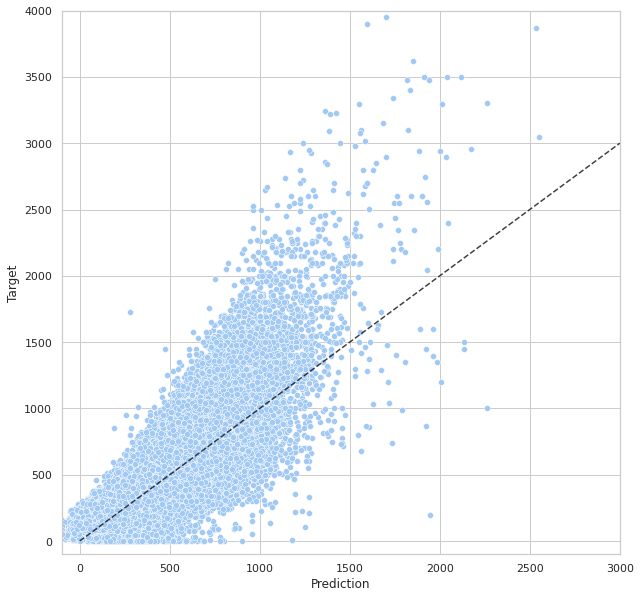

In [ ]:

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

predicted_values = np.array(reg.predict(x_train))
y_target = np.array(y_train)

sns.scatterplot(predicted_values, y_target, ax=ax)
sns.lineplot(range(0, 10000), range(0, 10000), color='black', linestyle='--', alpha=0.75, ax=ax)
plt.xlim(-100, 3000)
plt.ylim(-100, 4000)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()



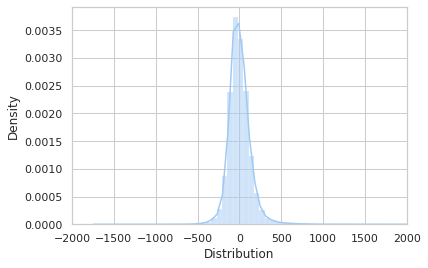

In [ ]:
data = y_target - predicted_values

sns.histplot(data, bins=200, kde=True, stat='density')
plt.xlim(-2000, 2000)
plt.xlabel('Distribution')

plt.show()

In [ ]:
# For data variable

args = ss.norm.fit(data)

kstest_pval = ss.kstest(data, cdf='norm', args=args).pvalue
kstest_stat = ss.kstest(data, cdf='norm', args=args).statistic
cramervonmises_pval = ss.cramervonmises(data, cdf='norm', args=args).pvalue
cramervonmises_stat = ss.cramervonmises(data, cdf='norm', args=args).statistic

print('Kolmogorov-Smirnov Test(pvalue): {:.12f}'.format(kstest_pval))
print('Kolmogorov-Smirnov Test(statistic): {:.12f}'.format(kstest_stat))
print('Cramer–Von Mises Test(pvalue): {:.12f}'.format(cramervonmises_pval))
print('Cramer–Von Mises Test(statistic): {:.12f}'.format(cramervonmises_stat))



Kolmogorov-Smirnov Test(pvalue): 0.000000000000
Kolmogorov-Smirnov Test(statistic): 0.067790436579
Cramer–Von Mises Test(pvalue): 0.000000103133
Cramer–Von Mises Test(statistic): 463.295916539521


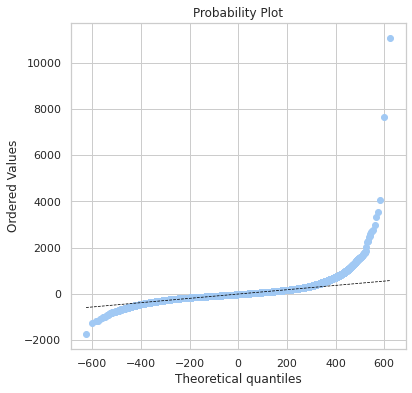

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.set_theme(style='whitegrid', palette='pastel')

args = ss.norm.fit(data)
scipy.stats.probplot(data, dist=ss.norm, sparams=(args), plot=ax)

ax.get_lines()[0].set_marker('o')    
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('black')
ax.get_lines()[1].set_linewidth(0.75)

plt.show()


In [ ]:
data.mean()

8.332469193447292e-12

In [ ]:
data.var()

19156.680627106245